<a href="https://colab.research.google.com/github/Whiteomi/Evidencia_2-/blob/main/2__lastmile_delivery_operations_mit_lift_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install funpymodeling
%pip install pandas


In [10]:
#importamos papalerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
import seaborn as sns
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
files.upload()

In [12]:
#leemos el archivo
data1 = pd.read_excel("lastmile_delivery_operations_mit_lift_lab.xlsx")
data1

,_record_id,_title,_server_updated_at,_created_by,_updated_by,_geometry,_latitude,_longitude,arrival_of_the_freight_vehicle,plates,...,used_traffic_cone,vehicles_unloading_door,number_of_available_trolleys,serving_customer,garage_blocking,accident,describe_the_accident,noise,traffic_congestion,maximum_number_of_vehicles_in_the_traffic_jam
0,1e369271-598a-464c-aec7-1913e82dc2b7,78 Avenida Orión Sur\nTlaxcalancingo Puebla 72...,2022-11-27 22:14:32 UTC,Adriel Antonio Huerta Vidal,Adriel Antonio Huerta Vidal,SRID=4326;POINT(-98.2603919 19.0213764),19.021376,-98.260392,15:35,21TFP4,...,no,Rear,0,NaN,no,no,NaN,no,no,NaN
1,4a749c00-7c5f-45cf-8950-aa988a0d41b8,581 Avenida Orión Sur\nTlaxcalancingo Puebla 7...,2022-11-27 22:14:31 UTC,Adriel Antonio Huerta Vidal,Adriel Antonio Huerta Vidal,SRID=4326;POINT(-98.2605677 19.0211113),19.021111,-98.260568,15:12,19TES7,...,no,Rear,0,NaN,no,no,NaN,no,no,NaN
2,c58a450d-fe1f-4a16-a8d8-764ebd8c49a4,4483 Calle Camino Real a Cholula\nSan Bernardi...,2022-11-27 20:12:39 UTC,María Pedraza,María Pedraza,SRID=4326;POINT(-98.2670348883 19.0352214575),19.035221,-98.267035,13:50,Sm49187,...,no,Rear,0,NaN,no,no,NaN,no,yes,NaN
3,1a337726-bb21-4316-b3e7-f0bb4acea77e,Cholula de Rivadavia PUE 72768\nMX,2022-11-27 08:18:55 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.2985606801 19.0817899522),19.081790,-98.298561,16:46,TXK-799-A,...,no,Rear,0,NaN,no,no,NaN,no,yes,NaN
4,97861280-d706-46da-b345-a6dc7bc627c4,Cholula de Rivadavia PUE 72768\nMX,2022-11-27 08:18:54 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.2985890313 19.0817705579),19.081771,-98.298589,12:38,SN-67-573,...,no,Rear,0,NaN,no,no,NaN,no,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,f964004e-67a0-4b75-b2b0-ce04b9f0b344,NaN,2022-11-03 17:54:56 UTC,José Oropeza,José Oropeza,SRID=4326;POINT(-98.194933077 19.043612116),19.043612,-98.194933,10:36,HL-3785-F,...,no,Rear,0,NaN,no,no,NaN,no,no,NaN
386,5656a189-19f5-45a7-b53b-1a3db0de6571,NaN,2022-11-03 17:54:56 UTC,José Oropeza,José Oropeza,SRID=4326;POINT(-98.1948560508 19.0436070826),19.043607,-98.194856,10:33,SP-29-798,...,no,Side,0,NaN,no,no,NaN,no,no,NaN
387,bcbd462b-4c63-490b-bfec-0ef6657ead73,406-B Avenida 2 Oriente\nPuebla PUE 72000\nMX,2022-11-03 17:54:44 UTC,Emilio Garza,Emilio Garza,SRID=4326;POINT(-98.1945033093 19.043335537),19.043336,-98.194503,11:19,05-AP-6G,...,no,Rear,1,NaN,no,no,NaN,no,no,NaN
388,cd9ba76d-d899-4d87-9512-486aedb1b149,402E Avenida 2 Oriente\nPuebla PUE 72000\nMX,2022-11-03 17:14:09 UTC,Emilio Garza,Emilio Garza,SRID=4326;POINT(-98.1948728731 19.0435760418),19.043576,-98.194873,11:03,LE-88-707,...,no,Rear,0,NaN,no,no,NaN,no,no,NaN


In [13]:
#vemos su informacion
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   _record_id                                     390 non-null    object 
 1   _title                                         380 non-null    object 
 2   _server_updated_at                             390 non-null    object 
 3   _created_by                                    390 non-null    object 
 4   _updated_by                                    390 non-null    object 
 5   _geometry                                      390 non-null    object 
 6   _latitude                                      390 non-null    float64
 7   _longitude                                     390 non-null    float64
 8   arrival_of_the_freight_vehicle                 390 non-null    object 
 9   plates                                         389 non

In [14]:
#Verificamos los valores nulos
valores_nulos=data1.isnull().sum()
valores_nulos

_record_id                                         0
_title                                            10
_server_updated_at                                 0
_created_by                                        0
_updated_by                                        0
_geometry                                          0
_latitude                                          0
_longitude                                         0
arrival_of_the_freight_vehicle                     0
plates                                             1
company_if_visible                               155
visit_purpose                                      0
type_of_vehicle                                    0
number_of_operators                                0
refrigerated_truck                                 0
type_of_cargo                                      1
picture_of_the_parked_freight_vehicle              0
departure_of_the_freight_vehicle                   0
where_was_the_vehicle_parked                  

In [15]:
#reemplazamos los valores nulos con la palabra nulo
data=data1.copy()
data["_title"] =data["_title"].fillna("nulo")
data["company_if_visible"] =data["company_if_visible"].fillna("nulo")
data["plates"] =data["plates"].fillna("nulo")
data["type_of_cargo"] =data["type_of_cargo"].fillna("nulo")
data["serving_customer"] =data["serving_customer"].fillna("nulo")
data["describe_the_accident"] =data["describe_the_accident"].fillna("nulo")
data["maximum_number_of_vehicles_in_the_traffic_jam"] =data["maximum_number_of_vehicles_in_the_traffic_jam"].fillna("nulo")

In [16]:
#verificamos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

_record_id                                       0
_title                                           0
_server_updated_at                               0
_created_by                                      0
_updated_by                                      0
_geometry                                        0
_latitude                                        0
_longitude                                       0
arrival_of_the_freight_vehicle                   0
plates                                           0
company_if_visible                               0
visit_purpose                                    0
type_of_vehicle                                  0
number_of_operators                              0
refrigerated_truck                               0
type_of_cargo                                    0
picture_of_the_parked_freight_vehicle            0
departure_of_the_freight_vehicle                 0
where_was_the_vehicle_parked                     0
while_parked_was_the_engine_run

In [17]:
#aplicamos filtro
filtro1=data.iloc[ : , [0,1,2,3,4,5,8,9,10,11,12,14,15,16,17,18,19,20,21,24,25,27,28]] #obj
filtro2=data.iloc[ : , [13,22,6,7]]    #valores numericos


<Figure size 1080x576 with 0 Axes>

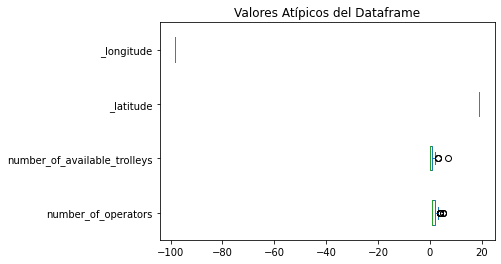

In [18]:
#hacemos una grafica de valores atipicos
fig = plt.figure(figsize =(15, 8))
filtro2.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [19]:
#hacemos uso del metodo de cuartiles 
y=filtro2

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido number_of_operators              3.500000
number_of_available_trolleys     2.500000
_latitude                       19.101536
_longitude                     -98.146671
dtype: float64
Limite inferior permitido number_of_operators             -0.500000
number_of_available_trolleys    -1.500000
_latitude                       18.970004
_longitude                     -98.330490
dtype: float64


In [20]:
#mostramos los limites 
outliers_iqr= filtro2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
outliers_iqr

,number_of_operators,number_of_available_trolleys,_latitude,_longitude
0,1.0,0.0,19.021376,-98.260392
1,1.0,0.0,19.021111,-98.260568
2,2.0,0.0,19.035221,-98.267035
3,2.0,0.0,19.081790,-98.298561
4,1.0,0.0,19.081771,-98.298589
...,...,...,...,...
385,1.0,0.0,19.043612,-98.194933
386,1.0,0.0,19.043607,-98.194856
387,1.0,1.0,19.043336,-98.194503
388,2.0,0.0,19.043576,-98.194873


In [21]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe 
Valores_finales= outliers_iqr.copy()
Valores_finales=Valores_finales.fillna(round(outliers_iqr.mean(),1))
Valores_finales

,number_of_operators,number_of_available_trolleys,_latitude,_longitude
0,1.0,0.0,19.021376,-98.260392
1,1.0,0.0,19.021111,-98.260568
2,2.0,0.0,19.035221,-98.267035
3,2.0,0.0,19.081790,-98.298561
4,1.0,0.0,19.081771,-98.298589
...,...,...,...,...
385,1.0,0.0,19.043612,-98.194933
386,1.0,0.0,19.043607,-98.194856
387,1.0,1.0,19.043336,-98.194503
388,2.0,0.0,19.043576,-98.194873


In [22]:
#vemos los valores nulos
valores_nulos=Valores_finales.isnull().sum()
valores_nulos

number_of_operators             0
number_of_available_trolleys    0
_latitude                       0
_longitude                      0
dtype: int64

In [23]:
#concatenamos 
Lastmile_customer_limpios = pd.concat([filtro1, filtro2], axis=1)
Lastmile_customer_limpios

,_record_id,_title,_server_updated_at,_created_by,_updated_by,_geometry,arrival_of_the_freight_vehicle,plates,company_if_visible,visit_purpose,...,used_traffic_cone,vehicles_unloading_door,garage_blocking,accident,noise,traffic_congestion,number_of_operators,number_of_available_trolleys,_latitude,_longitude
0,1e369271-598a-464c-aec7-1913e82dc2b7,78 Avenida Orión Sur\nTlaxcalancingo Puebla 72...,2022-11-27 22:14:32 UTC,Adriel Antonio Huerta Vidal,Adriel Antonio Huerta Vidal,SRID=4326;POINT(-98.2603919 19.0213764),15:35,21TFP4,nulo,Sales (usually small car or motorcycle),...,no,Rear,no,no,no,no,1,0,19.021376,-98.260392
1,4a749c00-7c5f-45cf-8950-aa988a0d41b8,581 Avenida Orión Sur\nTlaxcalancingo Puebla 7...,2022-11-27 22:14:31 UTC,Adriel Antonio Huerta Vidal,Adriel Antonio Huerta Vidal,SRID=4326;POINT(-98.2605677 19.0211113),15:12,19TES7,nulo,Sales (usually small car or motorcycle),...,no,Rear,no,no,no,no,1,0,19.021111,-98.260568
2,c58a450d-fe1f-4a16-a8d8-764ebd8c49a4,4483 Calle Camino Real a Cholula\nSan Bernardi...,2022-11-27 20:12:39 UTC,María Pedraza,María Pedraza,SRID=4326;POINT(-98.2670348883 19.0352214575),13:50,Sm49187,nulo,Delivery,...,no,Rear,no,no,no,yes,2,0,19.035221,-98.267035
3,1a337726-bb21-4316-b3e7-f0bb4acea77e,Cholula de Rivadavia PUE 72768\nMX,2022-11-27 08:18:55 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.2985606801 19.0817899522),16:46,TXK-799-A,nulo,Sales & delivery,...,no,Rear,no,no,no,yes,2,0,19.081790,-98.298561
4,97861280-d706-46da-b345-a6dc7bc627c4,Cholula de Rivadavia PUE 72768\nMX,2022-11-27 08:18:54 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.2985890313 19.0817705579),12:38,SN-67-573,nulo,Delivery,...,no,Rear,no,no,no,no,1,0,19.081771,-98.298589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,f964004e-67a0-4b75-b2b0-ce04b9f0b344,nulo,2022-11-03 17:54:56 UTC,José Oropeza,José Oropeza,SRID=4326;POINT(-98.194933077 19.043612116),10:36,HL-3785-F,nulo,Delivery,...,no,Rear,no,no,no,no,1,0,19.043612,-98.194933
386,5656a189-19f5-45a7-b53b-1a3db0de6571,nulo,2022-11-03 17:54:56 UTC,José Oropeza,José Oropeza,SRID=4326;POINT(-98.1948560508 19.0436070826),10:33,SP-29-798,nulo,Delivery,...,no,Side,no,no,no,no,1,0,19.043607,-98.194856
387,bcbd462b-4c63-490b-bfec-0ef6657ead73,406-B Avenida 2 Oriente\nPuebla PUE 72000\nMX,2022-11-03 17:54:44 UTC,Emilio Garza,Emilio Garza,SRID=4326;POINT(-98.1945033093 19.043335537),11:19,05-AP-6G,Infra,Delivery,...,no,Rear,no,no,no,no,1,1,19.043336,-98.194503
388,cd9ba76d-d899-4d87-9512-486aedb1b149,402E Avenida 2 Oriente\nPuebla PUE 72000\nMX,2022-11-03 17:14:09 UTC,Emilio Garza,Emilio Garza,SRID=4326;POINT(-98.1948728731 19.0435760418),11:03,LE-88-707,Alpura,Delivery,...,no,Rear,no,no,no,no,2,0,19.043576,-98.194873


Graficas y frecuencias

In [24]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(Lastmile_customer_limpios)

                               _record_id  frequency  percentage  \
0    1e369271-598a-464c-aec7-1913e82dc2b7          1    0.002564   
1    6f431744-a51b-4b36-b33f-13fb860ef131          1    0.002564   
2    2b0e047a-b369-4837-89ea-dc2ee2683bb3          1    0.002564   
3    0341e783-eb96-4f77-8629-04289dba411c          1    0.002564   
4    c09a34b6-013e-4019-b413-3e25a1bfe042          1    0.002564   
..                                    ...        ...         ...   
385  58d12d48-83aa-4fe0-b42a-9425acf5c134          1    0.002564   
386  46d1429d-cc2d-44f8-9adc-5e5fc8da3a60          1    0.002564   
387  570c3951-b85e-4c38-afdd-55480cda33d9          1    0.002564   
388  9498f27f-2d1b-458a-bfdc-3923a32e3b2d          1    0.002564   
389  657541f6-7871-4165-80b2-bef59db83e18          1    0.002564   

     cumulative_perc  
0           0.002564  
1           0.005128  
2           0.007692  
3           0.010256  
4           0.012821  
..               ...  
385         0.989744  

In [25]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Lastmile_customer_limpios['where_was_the_vehicle_parked'])
table1

,where_was_the_vehicle_parked,frequency,percentage,cumulative_perc
0,Street - next to the curbside,291,0.746154,0.746154
1,Public parking lot,42,0.107692,0.853846
2,Double lane,20,0.051282,0.905128
3,On top of a sidewalk,16,0.041026,0.946154
4,Store's garage,13,0.033333,0.979487
5,Dedicated unloading area (Bay),7,0.017949,0.997436
6,One corner apart,1,0.002564,1.000000


In [26]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,where_was_the_vehicle_parked,frequency,percentage,cumulative_perc
0,Street - next to the curbside,291,0.746154,0.746154
1,Public parking lot,42,0.107692,0.853846
2,Double lane,20,0.051282,0.905128
3,On top of a sidewalk,16,0.041026,0.946154
4,Store's garage,13,0.033333,0.979487
5,Dedicated unloading area (Bay),7,0.017949,0.997436


In [27]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('where_was_the_vehicle_parked')
Filtro_index

,frequency,percentage,cumulative_perc
where_was_the_vehicle_parked,,,
Street - next to the curbside,291,0.746154,0.746154
Public parking lot,42,0.107692,0.853846
Double lane,20,0.051282,0.905128
On top of a sidewalk,16,0.041026,0.946154
Store's garage,13,0.033333,0.979487
Dedicated unloading area (Bay),7,0.017949,0.997436


Text(0, 0.5, 'Frecuencia')

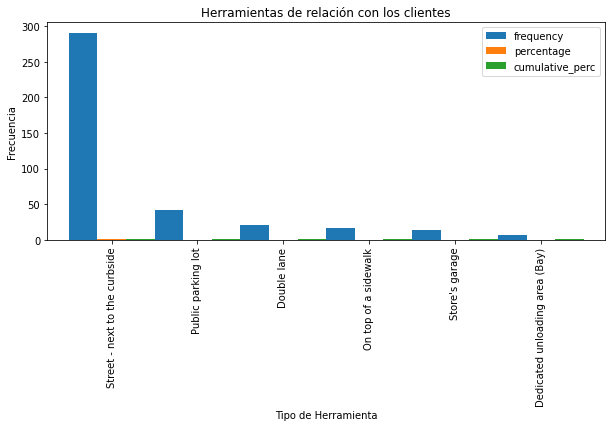

In [28]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

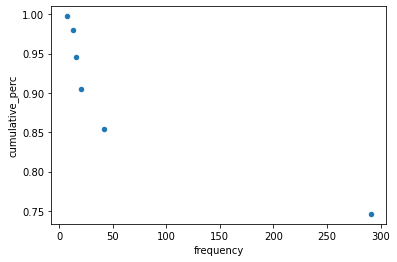

In [29]:
#Realizamos grafico de dispersión del dataframe filtrado
Filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

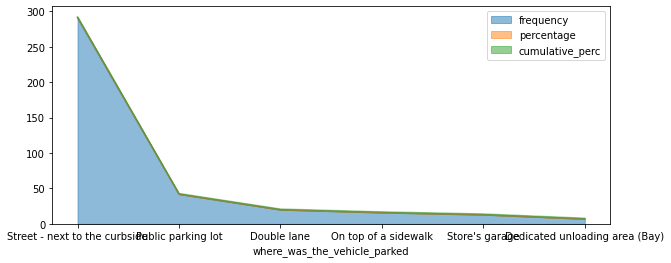

In [30]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

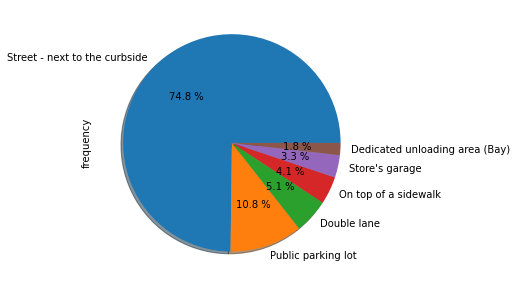

In [31]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

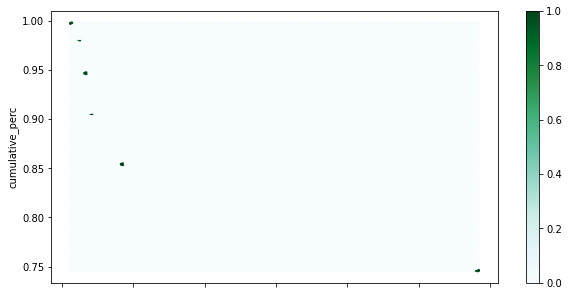

In [32]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
Filtro_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

Regresión lineal

In [33]:
#Cargar archivo csv desde seaborn
Lastmile_customer_limpios.head(10)


,_record_id,_title,_server_updated_at,_created_by,_updated_by,_geometry,arrival_of_the_freight_vehicle,plates,company_if_visible,visit_purpose,...,used_traffic_cone,vehicles_unloading_door,garage_blocking,accident,noise,traffic_congestion,number_of_operators,number_of_available_trolleys,_latitude,_longitude
0,1e369271-598a-464c-aec7-1913e82dc2b7,78 Avenida Orión Sur\nTlaxcalancingo Puebla 72...,2022-11-27 22:14:32 UTC,Adriel Antonio Huerta Vidal,Adriel Antonio Huerta Vidal,SRID=4326;POINT(-98.2603919 19.0213764),15:35,21TFP4,nulo,Sales (usually small car or motorcycle),...,no,Rear,no,no,no,no,1,0,19.021376,-98.260392
1,4a749c00-7c5f-45cf-8950-aa988a0d41b8,581 Avenida Orión Sur\nTlaxcalancingo Puebla 7...,2022-11-27 22:14:31 UTC,Adriel Antonio Huerta Vidal,Adriel Antonio Huerta Vidal,SRID=4326;POINT(-98.2605677 19.0211113),15:12,19TES7,nulo,Sales (usually small car or motorcycle),...,no,Rear,no,no,no,no,1,0,19.021111,-98.260568
2,c58a450d-fe1f-4a16-a8d8-764ebd8c49a4,4483 Calle Camino Real a Cholula\nSan Bernardi...,2022-11-27 20:12:39 UTC,María Pedraza,María Pedraza,SRID=4326;POINT(-98.2670348883 19.0352214575),13:50,Sm49187,nulo,Delivery,...,no,Rear,no,no,no,yes,2,0,19.035221,-98.267035
3,1a337726-bb21-4316-b3e7-f0bb4acea77e,Cholula de Rivadavia PUE 72768\nMX,2022-11-27 08:18:55 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.2985606801 19.0817899522),16:46,TXK-799-A,nulo,Sales & delivery,...,no,Rear,no,no,no,yes,2,0,19.081790,-98.298561
4,97861280-d706-46da-b345-a6dc7bc627c4,Cholula de Rivadavia PUE 72768\nMX,2022-11-27 08:18:54 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.2985890313 19.0817705579),12:38,SN-67-573,nulo,Delivery,...,no,Rear,no,no,no,no,1,0,19.081771,-98.298589
5,035f0941-8dc9-4b82-9877-e9cca9f44a5f,Cholula de Rivadavia PUE 72768\nMX,2022-11-27 08:18:54 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.298637931 19.0817256044),19:09,GMU8N,nulo,Sales (usually small car or motorcycle),...,no,Rear,no,no,no,no,1,0,19.081726,-98.298638
6,7f431fd5-b9e2-4d96-b656-67dd5d1efa9d,Cholula de Rivadavia PUE 72768\nMX,2022-11-27 08:18:54 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.2985935216 19.0817518281),17:43,YR-4835-C,nulo,Delivery,...,no,Rear,yes,no,yes,no,2,0,19.081752,-98.298594
7,99118653-645f-4fba-8f4e-2188b120c3bb,Cholula de Rivadavia PUE 72768\nMX,2022-11-27 08:18:53 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.2984725221 19.0817752594),17:23,GLA20,nulo,Sales (usually small car or motorcycle),...,no,Rear,no,no,no,no,1,0,19.081775,-98.298473
8,a6214740-63df-4e87-85fe-08c1ddf8cfff,Carretera Estatal Puebla Coronango\nCholula de...,2022-11-27 08:18:53 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.2985965439 19.0818395481),15:07,LF-66-855,nulo,Delivery,...,no,Rear,no,no,no,no,1,0,19.081840,-98.298597
9,198c914e-2654-48a2-bf12-c446eabcb414,Cholula de Rivadavia PUE 72768\nMX,2022-11-27 08:18:52 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.2985606801 19.0817899522),13:20,SK-17-220,nulo,Delivery,...,no,Rear,no,no,no,no,1,0,19.081790,-98.298561


In [34]:
#Rellenamos nulos
df =Lastmile_customer_limpios.fillna(method="ffill")
df =Lastmile_customer_limpios.fillna(method="bfill")


In [35]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['_latitude', '_longitude']]
Var_Dep= df['garage_blocking']

In [36]:
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [37]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [38]:
#Se escalan todos los datos
escalar = StandardScaler()

In [39]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [40]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [41]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [42]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no'], dtype=object)

In [43]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[107   0]
 [ 10   0]]


In [44]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9145299145299145


In [46]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.0


In [47]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.0


In [48]:
#Cargar archivo csv desde seaborn
Lastmile_customer_limpios.head(5)


,_record_id,_title,_server_updated_at,_created_by,_updated_by,_geometry,arrival_of_the_freight_vehicle,plates,company_if_visible,visit_purpose,...,used_traffic_cone,vehicles_unloading_door,garage_blocking,accident,noise,traffic_congestion,number_of_operators,number_of_available_trolleys,_latitude,_longitude
0,1e369271-598a-464c-aec7-1913e82dc2b7,78 Avenida Orión Sur\nTlaxcalancingo Puebla 72...,2022-11-27 22:14:32 UTC,Adriel Antonio Huerta Vidal,Adriel Antonio Huerta Vidal,SRID=4326;POINT(-98.2603919 19.0213764),15:35,21TFP4,nulo,Sales (usually small car or motorcycle),...,no,Rear,no,no,no,no,1,0,19.021376,-98.260392
1,4a749c00-7c5f-45cf-8950-aa988a0d41b8,581 Avenida Orión Sur\nTlaxcalancingo Puebla 7...,2022-11-27 22:14:31 UTC,Adriel Antonio Huerta Vidal,Adriel Antonio Huerta Vidal,SRID=4326;POINT(-98.2605677 19.0211113),15:12,19TES7,nulo,Sales (usually small car or motorcycle),...,no,Rear,no,no,no,no,1,0,19.021111,-98.260568
2,c58a450d-fe1f-4a16-a8d8-764ebd8c49a4,4483 Calle Camino Real a Cholula\nSan Bernardi...,2022-11-27 20:12:39 UTC,María Pedraza,María Pedraza,SRID=4326;POINT(-98.2670348883 19.0352214575),13:50,Sm49187,nulo,Delivery,...,no,Rear,no,no,no,yes,2,0,19.035221,-98.267035
3,1a337726-bb21-4316-b3e7-f0bb4acea77e,Cholula de Rivadavia PUE 72768\nMX,2022-11-27 08:18:55 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.2985606801 19.0817899522),16:46,TXK-799-A,nulo,Sales & delivery,...,no,Rear,no,no,no,yes,2,0,19.081790,-98.298561
4,97861280-d706-46da-b345-a6dc7bc627c4,Cholula de Rivadavia PUE 72768\nMX,2022-11-27 08:18:54 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.2985890313 19.0817705579),12:38,SN-67-573,nulo,Delivery,...,no,Rear,no,no,no,no,1,0,19.081771,-98.298589


In [49]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[["number_of_operators","number_of_available_trolleys"]]
Var_Dep= df['type_of_vehicle']

In [50]:
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [51]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [52]:
#Se escalan todos los datos
escalar = StandardScaler()

In [53]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [54]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [55]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [56]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

array(['Light truck or Van', 'Light truck or Van', 'Light truck or Van',
       'Light truck or Van', 'Light truck or Van', 'Light truck or Van',
       'Light truck or Van', 'Light truck or Van', 'Light truck or Van',
       'Light truck or Van', 'Light truck or Van', 'Light truck or Van',
       'Light truck or Van', 'Light truck or Van', 'Light truck or Van',
       'Light truck or Van', 'Light truck or Van', 'Light truck or Van',
       'Light truck or Van', 'Light truck or Van', 'Light truck or Van',
       'Light truck or Van', 'Light truck or Van', 'Light truck or Van',
       'Light truck or Van', 'Light truck or Van', 'Light truck or Van',
       'Light truck or Van', 'Light truck or Van', 'Light truck or Van',
       'Light truck or Van', 'Light truck or Van', 'Light truck or Van',
       'Light truck or Van', 'Light truck or Van', 'Light truck or Van',
       'Light truck or Van', 'Light truck or Van', 'Light truck or Van',
       'Light truck or Van', 'Light truck or Van', 

In [57]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[ 0  1 10  0  0  0]
 [ 0  1 19  0  1  0]
 [ 0  0 50  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  1 21  0  0  0]
 [ 0  0  7  0  0  0]]


In [58]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="micro", pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.4358974358974359


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [59]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.4358974358974359


In [60]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="micro", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.4358974358974359


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [61]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred, average="micro", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.4358974358974359


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [62]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['number_of_operators', 'number_of_available_trolleys']]
Var_Dep= df['used_traffic_cone']

In [63]:
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [64]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [65]:
#Se escalan todos los datos
escalar = StandardScaler()

In [66]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [67]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [68]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [69]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no'], dtype=object)

In [70]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[116   0]
 [  1   0]]


In [71]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9914529914529915


In [73]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.0


In [74]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.0


In [75]:
#Cargar archivo csv desde seaborn
Lastmile_customer_limpios.head(5)


,_record_id,_title,_server_updated_at,_created_by,_updated_by,_geometry,arrival_of_the_freight_vehicle,plates,company_if_visible,visit_purpose,...,used_traffic_cone,vehicles_unloading_door,garage_blocking,accident,noise,traffic_congestion,number_of_operators,number_of_available_trolleys,_latitude,_longitude
0,1e369271-598a-464c-aec7-1913e82dc2b7,78 Avenida Orión Sur\nTlaxcalancingo Puebla 72...,2022-11-27 22:14:32 UTC,Adriel Antonio Huerta Vidal,Adriel Antonio Huerta Vidal,SRID=4326;POINT(-98.2603919 19.0213764),15:35,21TFP4,nulo,Sales (usually small car or motorcycle),...,no,Rear,no,no,no,no,1,0,19.021376,-98.260392
1,4a749c00-7c5f-45cf-8950-aa988a0d41b8,581 Avenida Orión Sur\nTlaxcalancingo Puebla 7...,2022-11-27 22:14:31 UTC,Adriel Antonio Huerta Vidal,Adriel Antonio Huerta Vidal,SRID=4326;POINT(-98.2605677 19.0211113),15:12,19TES7,nulo,Sales (usually small car or motorcycle),...,no,Rear,no,no,no,no,1,0,19.021111,-98.260568
2,c58a450d-fe1f-4a16-a8d8-764ebd8c49a4,4483 Calle Camino Real a Cholula\nSan Bernardi...,2022-11-27 20:12:39 UTC,María Pedraza,María Pedraza,SRID=4326;POINT(-98.2670348883 19.0352214575),13:50,Sm49187,nulo,Delivery,...,no,Rear,no,no,no,yes,2,0,19.035221,-98.267035
3,1a337726-bb21-4316-b3e7-f0bb4acea77e,Cholula de Rivadavia PUE 72768\nMX,2022-11-27 08:18:55 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.2985606801 19.0817899522),16:46,TXK-799-A,nulo,Sales & delivery,...,no,Rear,no,no,no,yes,2,0,19.081790,-98.298561
4,97861280-d706-46da-b345-a6dc7bc627c4,Cholula de Rivadavia PUE 72768\nMX,2022-11-27 08:18:54 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.2985890313 19.0817705579),12:38,SN-67-573,nulo,Delivery,...,no,Rear,no,no,no,no,1,0,19.081771,-98.298589


In [76]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[["number_of_operators","number_of_available_trolleys"]]
Var_Dep= df['accident']

In [77]:
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [78]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [79]:
#Se escalan todos los datos
escalar = StandardScaler()

In [80]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [81]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [82]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [83]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no'], dtype=object)

In [84]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[117]]


In [85]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="micro", pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
1.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [86]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
1.0


In [87]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="micro", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
1.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [88]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred, average="micro", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
1.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [89]:
#Cargar archivo csv desde seaborn
Lastmile_customer_limpios.head(10)


,_record_id,_title,_server_updated_at,_created_by,_updated_by,_geometry,arrival_of_the_freight_vehicle,plates,company_if_visible,visit_purpose,...,used_traffic_cone,vehicles_unloading_door,garage_blocking,accident,noise,traffic_congestion,number_of_operators,number_of_available_trolleys,_latitude,_longitude
0,1e369271-598a-464c-aec7-1913e82dc2b7,78 Avenida Orión Sur\nTlaxcalancingo Puebla 72...,2022-11-27 22:14:32 UTC,Adriel Antonio Huerta Vidal,Adriel Antonio Huerta Vidal,SRID=4326;POINT(-98.2603919 19.0213764),15:35,21TFP4,nulo,Sales (usually small car or motorcycle),...,no,Rear,no,no,no,no,1,0,19.021376,-98.260392
1,4a749c00-7c5f-45cf-8950-aa988a0d41b8,581 Avenida Orión Sur\nTlaxcalancingo Puebla 7...,2022-11-27 22:14:31 UTC,Adriel Antonio Huerta Vidal,Adriel Antonio Huerta Vidal,SRID=4326;POINT(-98.2605677 19.0211113),15:12,19TES7,nulo,Sales (usually small car or motorcycle),...,no,Rear,no,no,no,no,1,0,19.021111,-98.260568
2,c58a450d-fe1f-4a16-a8d8-764ebd8c49a4,4483 Calle Camino Real a Cholula\nSan Bernardi...,2022-11-27 20:12:39 UTC,María Pedraza,María Pedraza,SRID=4326;POINT(-98.2670348883 19.0352214575),13:50,Sm49187,nulo,Delivery,...,no,Rear,no,no,no,yes,2,0,19.035221,-98.267035
3,1a337726-bb21-4316-b3e7-f0bb4acea77e,Cholula de Rivadavia PUE 72768\nMX,2022-11-27 08:18:55 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.2985606801 19.0817899522),16:46,TXK-799-A,nulo,Sales & delivery,...,no,Rear,no,no,no,yes,2,0,19.081790,-98.298561
4,97861280-d706-46da-b345-a6dc7bc627c4,Cholula de Rivadavia PUE 72768\nMX,2022-11-27 08:18:54 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.2985890313 19.0817705579),12:38,SN-67-573,nulo,Delivery,...,no,Rear,no,no,no,no,1,0,19.081771,-98.298589
5,035f0941-8dc9-4b82-9877-e9cca9f44a5f,Cholula de Rivadavia PUE 72768\nMX,2022-11-27 08:18:54 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.298637931 19.0817256044),19:09,GMU8N,nulo,Sales (usually small car or motorcycle),...,no,Rear,no,no,no,no,1,0,19.081726,-98.298638
6,7f431fd5-b9e2-4d96-b656-67dd5d1efa9d,Cholula de Rivadavia PUE 72768\nMX,2022-11-27 08:18:54 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.2985935216 19.0817518281),17:43,YR-4835-C,nulo,Delivery,...,no,Rear,yes,no,yes,no,2,0,19.081752,-98.298594
7,99118653-645f-4fba-8f4e-2188b120c3bb,Cholula de Rivadavia PUE 72768\nMX,2022-11-27 08:18:53 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.2984725221 19.0817752594),17:23,GLA20,nulo,Sales (usually small car or motorcycle),...,no,Rear,no,no,no,no,1,0,19.081775,-98.298473
8,a6214740-63df-4e87-85fe-08c1ddf8cfff,Carretera Estatal Puebla Coronango\nCholula de...,2022-11-27 08:18:53 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.2985965439 19.0818395481),15:07,LF-66-855,nulo,Delivery,...,no,Rear,no,no,no,no,1,0,19.081840,-98.298597
9,198c914e-2654-48a2-bf12-c446eabcb414,Cholula de Rivadavia PUE 72768\nMX,2022-11-27 08:18:52 UTC,Saúl Cuervo,Saúl Cuervo,SRID=4326;POINT(-98.2985606801 19.0817899522),13:20,SK-17-220,nulo,Delivery,...,no,Rear,no,no,no,no,1,0,19.081790,-98.298561


In [90]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[["_latitude","_longitude"]]
Var_Dep= df['traffic_congestion']

In [91]:
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [92]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [93]:
#Se escalan todos los datos
escalar = StandardScaler()

In [94]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [95]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [96]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [97]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no'], dtype=object)

In [98]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[109   0]
 [  8   0]]


In [99]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="micro", pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9316239316239316


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [100]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9316239316239316


In [101]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="micro", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.9316239316239316


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [102]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred, average="micro", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.9316239316239316


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
